Epoch 1/100


D:\Microsoft VS Code\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 - 3s - 678ms/step - loss: 0.1832
Epoch 2/100
5/5 - 0s - 8ms/step - loss: 0.1563
Epoch 3/100
5/5 - 0s - 9ms/step - loss: 0.1363
Epoch 4/100
5/5 - 0s - 9ms/step - loss: 0.1167
Epoch 5/100
5/5 - 0s - 9ms/step - loss: 0.0946
Epoch 6/100
5/5 - 0s - 9ms/step - loss: 0.0751
Epoch 7/100
5/5 - 0s - 9ms/step - loss: 0.0637
Epoch 8/100
5/5 - 0s - 10ms/step - loss: 0.0486
Epoch 9/100
5/5 - 0s - 10ms/step - loss: 0.0368
Epoch 10/100
5/5 - 0s - 10ms/step - loss: 0.0320
Epoch 11/100
5/5 - 0s - 9ms/step - loss: 0.0271
Epoch 12/100
5/5 - 0s - 9ms/step - loss: 0.0240
Epoch 13/100
5/5 - 0s - 8ms/step - loss: 0.0247
Epoch 14/100
5/5 - 0s - 9ms/step - loss: 0.0240
Epoch 15/100
5/5 - 0s - 10ms/step - loss: 0.0256
Epoch 16/100
5/5 - 0s - 9ms/step - loss: 0.0247
Epoch 17/100
5/5 - 0s - 9ms/step - loss: 0.0248
Epoch 18/100
5/5 - 0s - 9ms/step - loss: 0.0242
Epoch 19/100
5/5 - 0s - 9ms/step - loss: 0.0242
Epoch 20/100
5/5 - 0s - 10ms/step - loss: 0.0242
Epoch 21/100
5/5 - 0s - 10ms/step - loss: 0.0240
Epoch

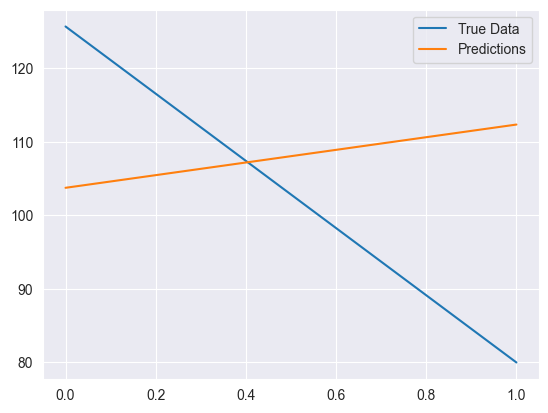

In [6]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 假设你已经将CSV文件加载到Pandas DataFrame中
data = pd.read_csv('adolescentBirthRate.csv')

# 数据预处理
# 选择一个国家的数据进行分析，这里以阿富汗为例
afghanistan_data = data[data['Location'] == 'Afghanistan']

# 提取年份和生育率
years = afghanistan_data['Period'].values
birth_rates = afghanistan_data['First Tooltip'].values

# 数据标准化
scaler = MinMaxScaler(feature_range=(0, 1))
birth_rates_scaled = scaler.fit_transform(birth_rates.reshape(-1, 1))

# 创建时间序列数据集
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3  # 使用更多的历史数据来预测下一个值
X, Y = create_dataset(birth_rates_scaled, look_back)

# 划分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 确保输入数据是三维的
X_train = X_train.reshape(X_train.shape[0], look_back, 1)
X_test = X_test.reshape(X_test.shape[0], look_back, 1)

# 构建LSTM模型
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1), return_sequences=True))
model.add(LSTM(1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# 训练模型
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# 预测
predictions = model.predict(X_test)
predictions = predictions.reshape(-1, 1)  # 确保predictions是二维数组

# 反标准化测试集和预测值
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))  # 确保Y_test是二维数组
predictions = scaler.inverse_transform(predictions)

# 计算预测值和实际值之间的误差
error = np.mean(np.abs(predictions - Y_test))
print(f'Error: {error}')

# 可视化预测结果
plt.plot(Y_test, label='True Data')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()